In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better visual style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13

# Load dataset
df = pd.read_csv("bank_dataset.csv", skiprows=3)
df = df[df["Indicator Name"] == "Population, total"]
df = df[["Country Name", "Country Code", "2023"]].dropna()
df["2023"] = df["2023"].astype(int)



/tmp/ipython-input-15-304634455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, y="Country Name", x="2023", palette="viridis", hue=None)


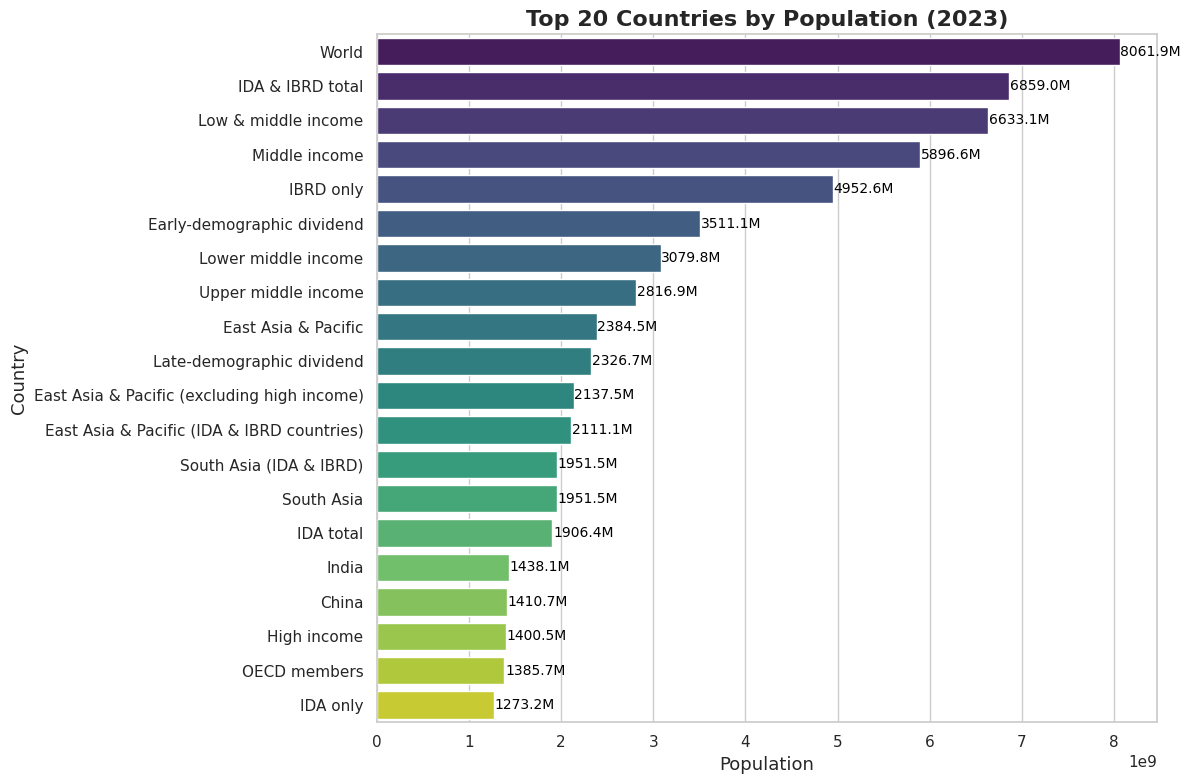

In [15]:
top20 = df.sort_values(by="2023", ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top20, y="Country Name", x="2023", palette="viridis", hue=None)

for i, v in enumerate(top20["2023"]):
    plt.text(v + 5e6, i, f'{v/1e6:.1f}M', va='center', fontsize=10, color='black')

plt.title("Top 20 Countries by Population (2023)", weight="bold")
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


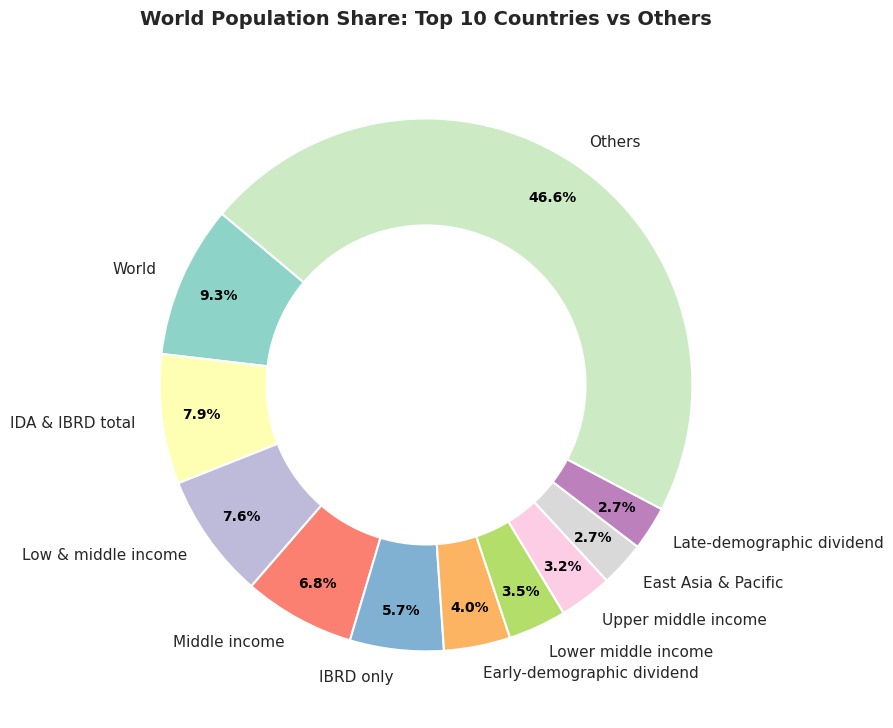

In [17]:
top10 = top20.head(10)
others = df["2023"].sum() - top10["2023"].sum()

labels = list(top10["Country Name"]) + ["Others"]
sizes = list(top10["2023"]) + [others]

# Aesthetic pastel color palette
colors = sns.color_palette("Set3", n_colors=len(labels))

# Create figure
fig, ax = plt.subplots(figsize=(9, 9))

# Draw donut chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Draw center circle (donut)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# Text formatting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

# Title
ax.set_title("World Population Share: Top 10 Countries vs Others", fontsize=14, weight="bold", pad=20)

plt.tight_layout()
plt.show()


/tmp/ipython-input-18-2055923585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_df, x="2023", y="Country Name", palette="coolwarm", hue=None)


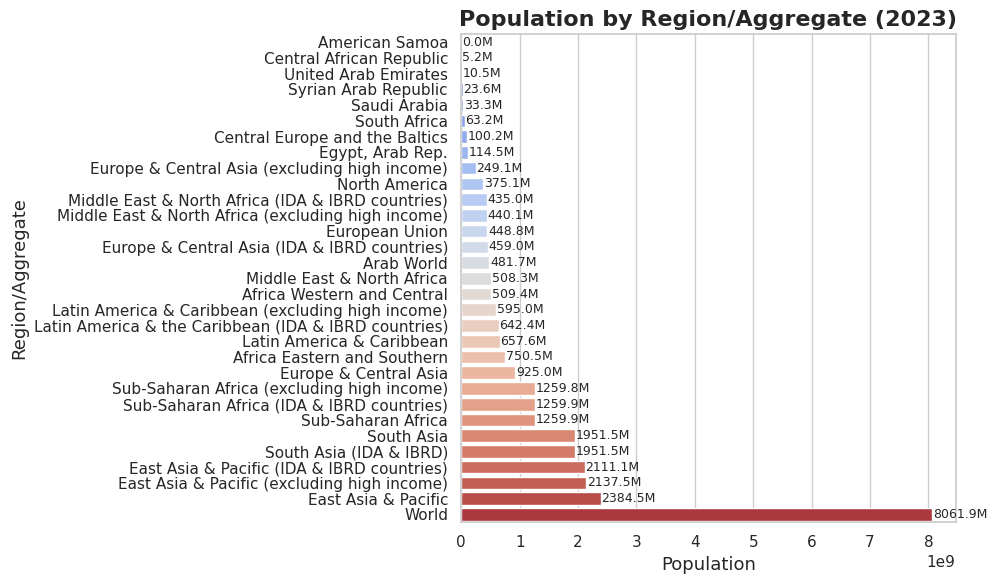

In [18]:
region_df = df[df["Country Name"].str.contains("Africa|World|Europe|Asia|America|Arab", case=False)]
region_df = region_df.sort_values(by="2023", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_df, x="2023", y="Country Name", palette="coolwarm", hue=None)

for i, v in enumerate(region_df["2023"]):
    plt.text(v + 1e7, i, f'{v/1e6:.1f}M', va='center', fontsize=9)

plt.title("Population by Region/Aggregate (2023)", weight="bold")
plt.xlabel("Population")
plt.ylabel("Region/Aggregate")
plt.tight_layout()
plt.show()


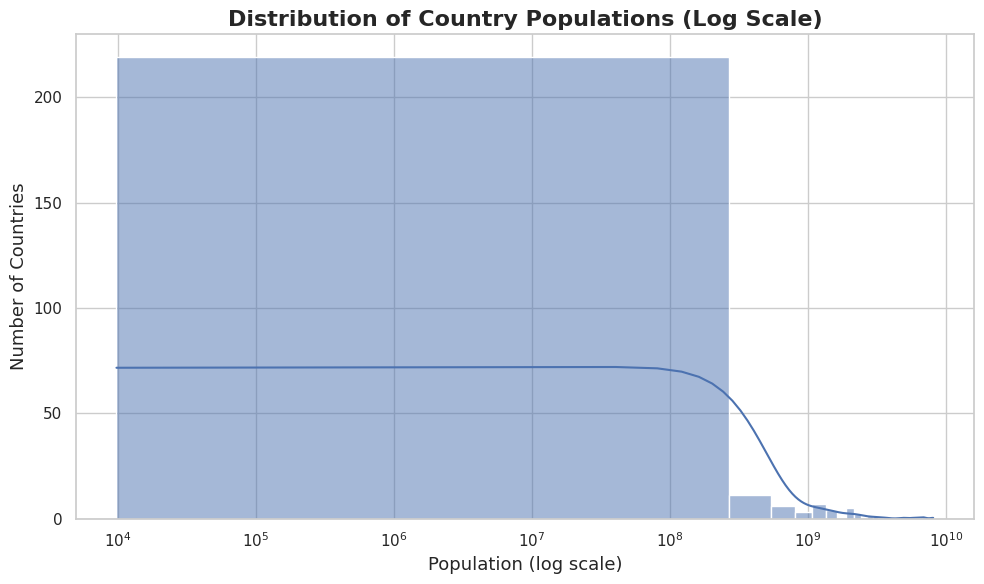

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df["2023"], bins=30, kde=True, color='#4c72b0', edgecolor='white')
plt.xscale('log')
plt.title("Distribution of Country Populations (Log Scale)", weight="bold")
plt.xlabel("Population (log scale)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()
